# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

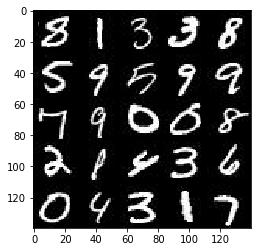

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

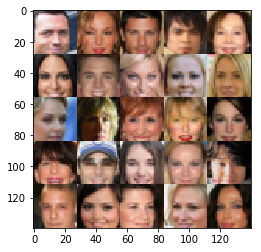

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, shape=(), name="learning_rate")

    return inputs_real, inputs_z, learning_rate
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # OK: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/dhruva.gupta/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/dhruva.gupta/anaconda3/lib/p

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
#'''
def discriminator(images, reuse=False,  alpha=0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    drop_rate = .2 
    with tf.variable_scope('discriminator', reuse = reuse ):
        x1 = tf.layers.dropout(images, rate=drop_rate)
        
        #x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        x1 = tf.layers.conv2d(x1, 64, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        X1 = tf.layers.dropout(x1, rate=drop_rate)
        x1 = tf.maximum(alpha * x1, x1)
        
        # 16x16x64
        
        #x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        x2 = tf.layers.conv2d(x1, 128, 5, strides=1, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        # 8x8x128
        
        #x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', kernel_initializer = tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.layers.dropout(x3, rate=drop_rate)
        x3 = tf.maximum(alpha * x3, x3)
       
        # 4x4x256

        # Flatten it
        flat = tf.reshape(x3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits

'''
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # OK: Implement Function

    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer 1
        h1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        lrelu1 = tf.maximum(alpha * h1, h1)
        
        
        # Hidden Layer 2
        h2 = tf.layers.conv2d(lrelu1, 128, 5, strides=1, padding="SAME",
                              kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn2 = tf.layers.batch_normalization(h2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        
        
        # Hidden Layer 3
        h3 = tf.layers.conv2d(lrelu2, 256, 5, strides=2, padding="SAME", 
                             kernel_initializer = tf.random_normal_initializer(stddev=0.02))
        bn3 = tf.layers.batch_normalization(h3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        
        #Flatten
        flat = tf.reshape(lrelu3, (-1, 7*7*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits
'''
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7,7,256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1.shape)
        # 7X7X256 now
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2.shape)
        # 14x14x128 now
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #print(x3.shape)
        # 28x28x64 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        #print(logits.shape)
        # 28x28x3 now
        
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    
    # TODO: Implement Function
    #Generator
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    #Discriminator
    smooth = 0.1
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    d_updates = [var for var in update_ops if var.name.startswith('discriminator')]
    g_updates = [var for var in update_ops if var.name.startswith('generator')]
    
    with tf.control_dependencies(d_updates):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    #g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    #with tf.control_dependencies(g_updates):
    #    g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    ''' 
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    '''
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # Set the image dimensions
    _, image_width, image_height, image_channels = data_shape

    # Implement model_inputs to set the input_real, input_z, and learning rate
    input_real, input_z, _learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)

   # Implement model_loss to set the d_loss and g_loss
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)


    # Implement model_opt to set d_train_opt and g_train_opt
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    # Batch counter
    batch_count = 0
    
    # Number of images to print
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # Multiply batch_images by 2.0 since the dataset ranges from -0.5 to 0.5
                batch_images = batch_images*2.0
                
                # Random noise for generator
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
                
                # Increment the batch count
                batch_count += 1

                # Print the d_train_loss and g_train_loss every 10 batches
                if (batch_count % 10 == 0):
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))   
                    
                # Print the generator output every 100 batches
                if (batch_count % 100 == 0):
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4412... Generator Loss: 2.6472
Epoch 1/2... Discriminator Loss: 3.2679... Generator Loss: 0.1003
Epoch 1/2... Discriminator Loss: 2.3226... Generator Loss: 0.2508
Epoch 1/2... Discriminator Loss: 1.8903... Generator Loss: 0.3676
Epoch 1/2... Discriminator Loss: 0.9419... Generator Loss: 1.2005
Epoch 1/2... Discriminator Loss: 0.7259... Generator Loss: 1.8718
Epoch 1/2... Discriminator Loss: 0.7928... Generator Loss: 1.8286
Epoch 1/2... Discriminator Loss: 0.6647... Generator Loss: 2.6295
Epoch 1/2... Discriminator Loss: 1.2230... Generator Loss: 0.7014
Epoch 1/2... Discriminator Loss: 1.0024... Generator Loss: 3.8046


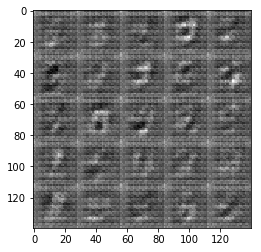

Epoch 1/2... Discriminator Loss: 0.7496... Generator Loss: 1.3904
Epoch 1/2... Discriminator Loss: 0.9479... Generator Loss: 3.2904
Epoch 1/2... Discriminator Loss: 1.4358... Generator Loss: 0.5336
Epoch 1/2... Discriminator Loss: 0.8695... Generator Loss: 1.0401
Epoch 1/2... Discriminator Loss: 0.8137... Generator Loss: 1.1715
Epoch 1/2... Discriminator Loss: 0.7637... Generator Loss: 1.2510
Epoch 1/2... Discriminator Loss: 0.8592... Generator Loss: 2.8288
Epoch 1/2... Discriminator Loss: 0.7150... Generator Loss: 1.4080
Epoch 1/2... Discriminator Loss: 0.6078... Generator Loss: 2.2801
Epoch 1/2... Discriminator Loss: 0.8091... Generator Loss: 1.1900


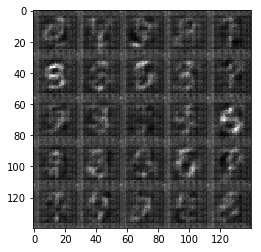

Epoch 1/2... Discriminator Loss: 0.5541... Generator Loss: 2.1055
Epoch 1/2... Discriminator Loss: 0.6328... Generator Loss: 1.7291
Epoch 1/2... Discriminator Loss: 0.5747... Generator Loss: 1.9677
Epoch 1/2... Discriminator Loss: 0.5576... Generator Loss: 2.2240
Epoch 1/2... Discriminator Loss: 0.6136... Generator Loss: 2.3790
Epoch 1/2... Discriminator Loss: 0.5830... Generator Loss: 2.8091
Epoch 1/2... Discriminator Loss: 0.7429... Generator Loss: 1.2189
Epoch 1/2... Discriminator Loss: 0.8561... Generator Loss: 1.0769
Epoch 1/2... Discriminator Loss: 0.5408... Generator Loss: 2.2314
Epoch 1/2... Discriminator Loss: 1.4744... Generator Loss: 4.3330


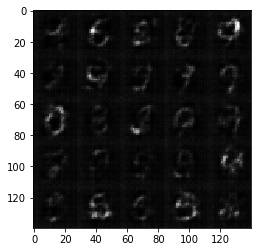

Epoch 1/2... Discriminator Loss: 0.6845... Generator Loss: 1.4179
Epoch 1/2... Discriminator Loss: 0.6446... Generator Loss: 1.6465
Epoch 1/2... Discriminator Loss: 0.6137... Generator Loss: 3.0090
Epoch 1/2... Discriminator Loss: 0.6510... Generator Loss: 2.9694
Epoch 1/2... Discriminator Loss: 0.5861... Generator Loss: 2.0161
Epoch 1/2... Discriminator Loss: 0.6138... Generator Loss: 1.5930
Epoch 1/2... Discriminator Loss: 0.6247... Generator Loss: 2.9293
Epoch 1/2... Discriminator Loss: 0.5440... Generator Loss: 2.1494
Epoch 1/2... Discriminator Loss: 0.5416... Generator Loss: 1.9802
Epoch 1/2... Discriminator Loss: 0.6553... Generator Loss: 1.4692


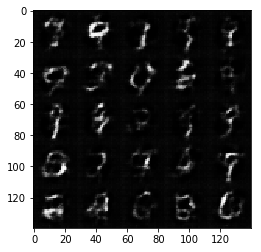

Epoch 1/2... Discriminator Loss: 0.7588... Generator Loss: 1.2644
Epoch 1/2... Discriminator Loss: 0.6028... Generator Loss: 1.9432
Epoch 1/2... Discriminator Loss: 0.5595... Generator Loss: 1.8860
Epoch 1/2... Discriminator Loss: 2.9052... Generator Loss: 6.1398
Epoch 1/2... Discriminator Loss: 0.9010... Generator Loss: 1.0183
Epoch 1/2... Discriminator Loss: 0.8233... Generator Loss: 1.0876
Epoch 1/2... Discriminator Loss: 0.5157... Generator Loss: 2.5317
Epoch 1/2... Discriminator Loss: 0.9849... Generator Loss: 0.9561
Epoch 1/2... Discriminator Loss: 0.6188... Generator Loss: 1.9503
Epoch 1/2... Discriminator Loss: 0.5799... Generator Loss: 1.7678


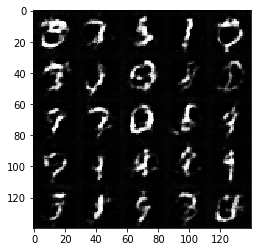

Epoch 1/2... Discriminator Loss: 0.6067... Generator Loss: 2.2845
Epoch 1/2... Discriminator Loss: 0.9664... Generator Loss: 0.8704
Epoch 1/2... Discriminator Loss: 0.6658... Generator Loss: 1.6983
Epoch 1/2... Discriminator Loss: 0.9729... Generator Loss: 0.9419
Epoch 1/2... Discriminator Loss: 0.6406... Generator Loss: 1.7741
Epoch 1/2... Discriminator Loss: 0.6922... Generator Loss: 1.4048
Epoch 1/2... Discriminator Loss: 0.5684... Generator Loss: 2.0506
Epoch 1/2... Discriminator Loss: 0.6001... Generator Loss: 2.1138
Epoch 1/2... Discriminator Loss: 1.9366... Generator Loss: 0.3380
Epoch 1/2... Discriminator Loss: 0.9011... Generator Loss: 1.4470


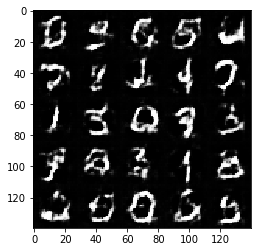

Epoch 1/2... Discriminator Loss: 1.0167... Generator Loss: 0.8720
Epoch 1/2... Discriminator Loss: 1.5303... Generator Loss: 3.4084
Epoch 1/2... Discriminator Loss: 0.6140... Generator Loss: 2.1105
Epoch 1/2... Discriminator Loss: 0.6643... Generator Loss: 2.0420
Epoch 1/2... Discriminator Loss: 0.6758... Generator Loss: 1.4791
Epoch 1/2... Discriminator Loss: 0.8579... Generator Loss: 1.0044
Epoch 1/2... Discriminator Loss: 0.8199... Generator Loss: 1.0975
Epoch 1/2... Discriminator Loss: 0.5723... Generator Loss: 1.9845
Epoch 1/2... Discriminator Loss: 0.7046... Generator Loss: 1.3021
Epoch 1/2... Discriminator Loss: 1.3968... Generator Loss: 0.5410


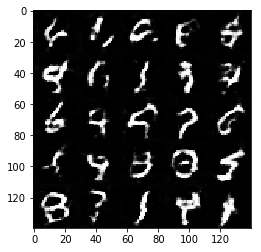

Epoch 1/2... Discriminator Loss: 0.9292... Generator Loss: 1.8433
Epoch 1/2... Discriminator Loss: 0.7961... Generator Loss: 1.5887
Epoch 1/2... Discriminator Loss: 0.7672... Generator Loss: 1.4206
Epoch 1/2... Discriminator Loss: 0.8688... Generator Loss: 1.2101
Epoch 1/2... Discriminator Loss: 0.6900... Generator Loss: 1.8196
Epoch 1/2... Discriminator Loss: 0.6382... Generator Loss: 1.5644
Epoch 1/2... Discriminator Loss: 0.7396... Generator Loss: 1.3577
Epoch 1/2... Discriminator Loss: 0.6875... Generator Loss: 1.6891
Epoch 1/2... Discriminator Loss: 1.2368... Generator Loss: 3.2087
Epoch 1/2... Discriminator Loss: 0.5861... Generator Loss: 1.7360


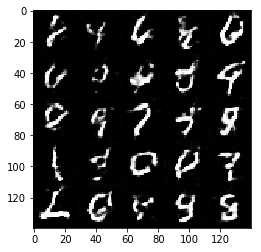

Epoch 1/2... Discriminator Loss: 0.5984... Generator Loss: 2.1960
Epoch 1/2... Discriminator Loss: 0.8136... Generator Loss: 1.1010
Epoch 1/2... Discriminator Loss: 0.6164... Generator Loss: 1.5977
Epoch 1/2... Discriminator Loss: 0.6963... Generator Loss: 2.3002
Epoch 1/2... Discriminator Loss: 1.3457... Generator Loss: 2.6471
Epoch 1/2... Discriminator Loss: 0.7138... Generator Loss: 1.4884
Epoch 1/2... Discriminator Loss: 0.6550... Generator Loss: 1.5678
Epoch 1/2... Discriminator Loss: 0.6648... Generator Loss: 1.5934
Epoch 1/2... Discriminator Loss: 0.6868... Generator Loss: 1.3424
Epoch 1/2... Discriminator Loss: 0.7858... Generator Loss: 1.9837


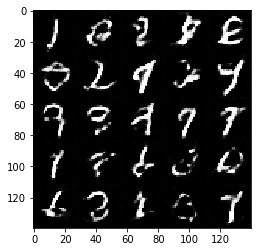

Epoch 1/2... Discriminator Loss: 0.7452... Generator Loss: 1.9832
Epoch 1/2... Discriminator Loss: 0.7871... Generator Loss: 1.1667
Epoch 1/2... Discriminator Loss: 0.8136... Generator Loss: 1.1296
Epoch 2/2... Discriminator Loss: 0.7272... Generator Loss: 1.2725
Epoch 2/2... Discriminator Loss: 0.5973... Generator Loss: 2.0963
Epoch 2/2... Discriminator Loss: 0.5762... Generator Loss: 1.6648
Epoch 2/2... Discriminator Loss: 0.6261... Generator Loss: 1.6734
Epoch 2/2... Discriminator Loss: 0.6236... Generator Loss: 1.5985
Epoch 2/2... Discriminator Loss: 0.7724... Generator Loss: 1.1786
Epoch 2/2... Discriminator Loss: 1.0504... Generator Loss: 2.3644


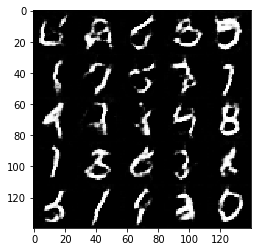

Epoch 2/2... Discriminator Loss: 0.7105... Generator Loss: 2.4849
Epoch 2/2... Discriminator Loss: 0.8318... Generator Loss: 1.1113
Epoch 2/2... Discriminator Loss: 1.0487... Generator Loss: 0.7884
Epoch 2/2... Discriminator Loss: 0.7080... Generator Loss: 1.3503
Epoch 2/2... Discriminator Loss: 0.7268... Generator Loss: 1.2661
Epoch 2/2... Discriminator Loss: 0.8559... Generator Loss: 1.6765
Epoch 2/2... Discriminator Loss: 1.0190... Generator Loss: 1.6130
Epoch 2/2... Discriminator Loss: 0.9617... Generator Loss: 1.0453
Epoch 2/2... Discriminator Loss: 0.8596... Generator Loss: 1.1859
Epoch 2/2... Discriminator Loss: 0.8152... Generator Loss: 1.7473


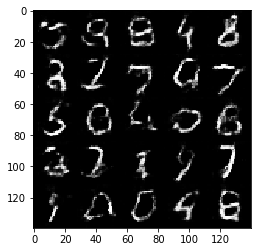

Epoch 2/2... Discriminator Loss: 0.7279... Generator Loss: 1.7089
Epoch 2/2... Discriminator Loss: 0.7218... Generator Loss: 1.3396
Epoch 2/2... Discriminator Loss: 1.5590... Generator Loss: 0.4364
Epoch 2/2... Discriminator Loss: 0.6389... Generator Loss: 2.3060
Epoch 2/2... Discriminator Loss: 0.6178... Generator Loss: 1.8865
Epoch 2/2... Discriminator Loss: 0.5860... Generator Loss: 1.9044
Epoch 2/2... Discriminator Loss: 0.6540... Generator Loss: 1.5301
Epoch 2/2... Discriminator Loss: 0.8263... Generator Loss: 1.1107
Epoch 2/2... Discriminator Loss: 0.9371... Generator Loss: 0.9491
Epoch 2/2... Discriminator Loss: 1.1905... Generator Loss: 0.7923


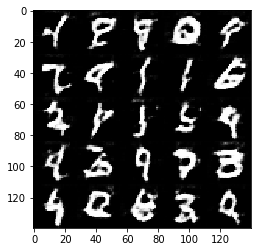

Epoch 2/2... Discriminator Loss: 0.8077... Generator Loss: 1.1656
Epoch 2/2... Discriminator Loss: 0.6742... Generator Loss: 1.3937
Epoch 2/2... Discriminator Loss: 0.6955... Generator Loss: 1.3261
Epoch 2/2... Discriminator Loss: 0.7693... Generator Loss: 1.2480
Epoch 2/2... Discriminator Loss: 0.7412... Generator Loss: 1.7854
Epoch 2/2... Discriminator Loss: 0.8209... Generator Loss: 1.5703
Epoch 2/2... Discriminator Loss: 0.6377... Generator Loss: 1.8118
Epoch 2/2... Discriminator Loss: 1.1896... Generator Loss: 0.6724
Epoch 2/2... Discriminator Loss: 0.7294... Generator Loss: 1.3330
Epoch 2/2... Discriminator Loss: 0.6017... Generator Loss: 1.6632


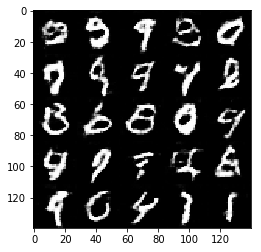

Epoch 2/2... Discriminator Loss: 0.8723... Generator Loss: 0.9815
Epoch 2/2... Discriminator Loss: 0.9212... Generator Loss: 2.7557
Epoch 2/2... Discriminator Loss: 0.7396... Generator Loss: 1.3568
Epoch 2/2... Discriminator Loss: 0.7503... Generator Loss: 1.3279
Epoch 2/2... Discriminator Loss: 0.6364... Generator Loss: 2.3935
Epoch 2/2... Discriminator Loss: 0.8282... Generator Loss: 1.0875
Epoch 2/2... Discriminator Loss: 0.7472... Generator Loss: 1.2173
Epoch 2/2... Discriminator Loss: 1.6132... Generator Loss: 3.5285
Epoch 2/2... Discriminator Loss: 1.3716... Generator Loss: 0.5541
Epoch 2/2... Discriminator Loss: 0.7348... Generator Loss: 1.8961


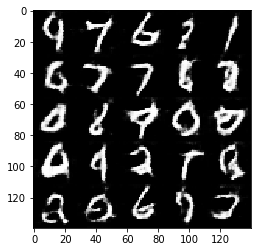

Epoch 2/2... Discriminator Loss: 0.7109... Generator Loss: 1.4304
Epoch 2/2... Discriminator Loss: 0.6558... Generator Loss: 1.6356
Epoch 2/2... Discriminator Loss: 0.8001... Generator Loss: 1.2043
Epoch 2/2... Discriminator Loss: 1.0602... Generator Loss: 0.8704
Epoch 2/2... Discriminator Loss: 0.7069... Generator Loss: 1.7184
Epoch 2/2... Discriminator Loss: 0.6677... Generator Loss: 1.6613
Epoch 2/2... Discriminator Loss: 0.7172... Generator Loss: 1.3105
Epoch 2/2... Discriminator Loss: 1.1520... Generator Loss: 0.8388
Epoch 2/2... Discriminator Loss: 0.9646... Generator Loss: 1.6208
Epoch 2/2... Discriminator Loss: 0.8893... Generator Loss: 1.1286


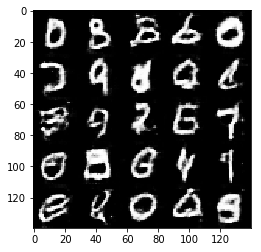

Epoch 2/2... Discriminator Loss: 1.2201... Generator Loss: 2.7723
Epoch 2/2... Discriminator Loss: 0.8710... Generator Loss: 1.6474
Epoch 2/2... Discriminator Loss: 0.7511... Generator Loss: 1.3016
Epoch 2/2... Discriminator Loss: 0.7433... Generator Loss: 2.1011
Epoch 2/2... Discriminator Loss: 0.9059... Generator Loss: 0.9922
Epoch 2/2... Discriminator Loss: 0.8740... Generator Loss: 1.0531
Epoch 2/2... Discriminator Loss: 0.7633... Generator Loss: 1.2519
Epoch 2/2... Discriminator Loss: 0.7901... Generator Loss: 1.1933
Epoch 2/2... Discriminator Loss: 3.3201... Generator Loss: 4.2449
Epoch 2/2... Discriminator Loss: 0.9566... Generator Loss: 1.1143


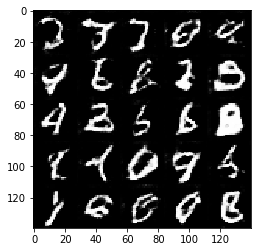

Epoch 2/2... Discriminator Loss: 0.9366... Generator Loss: 1.3341
Epoch 2/2... Discriminator Loss: 0.9993... Generator Loss: 1.1879
Epoch 2/2... Discriminator Loss: 0.9085... Generator Loss: 1.8395
Epoch 2/2... Discriminator Loss: 0.8834... Generator Loss: 1.3932
Epoch 2/2... Discriminator Loss: 0.7824... Generator Loss: 2.1096
Epoch 2/2... Discriminator Loss: 1.0675... Generator Loss: 0.8060
Epoch 2/2... Discriminator Loss: 0.9982... Generator Loss: 0.9470
Epoch 2/2... Discriminator Loss: 0.7764... Generator Loss: 1.3518
Epoch 2/2... Discriminator Loss: 0.7559... Generator Loss: 1.4439
Epoch 2/2... Discriminator Loss: 0.9109... Generator Loss: 1.4161


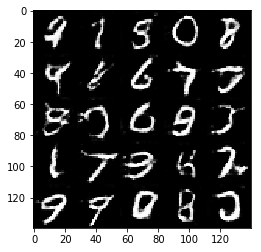

Epoch 2/2... Discriminator Loss: 0.6475... Generator Loss: 1.6626
Epoch 2/2... Discriminator Loss: 1.3715... Generator Loss: 0.5923
Epoch 2/2... Discriminator Loss: 0.7786... Generator Loss: 1.5841
Epoch 2/2... Discriminator Loss: 0.8684... Generator Loss: 1.0798
Epoch 2/2... Discriminator Loss: 0.7151... Generator Loss: 1.6419
Epoch 2/2... Discriminator Loss: 1.9398... Generator Loss: 0.3461
Epoch 2/2... Discriminator Loss: 0.8372... Generator Loss: 1.3807
Epoch 2/2... Discriminator Loss: 0.6564... Generator Loss: 2.0621
Epoch 2/2... Discriminator Loss: 0.7815... Generator Loss: 1.5247
Epoch 2/2... Discriminator Loss: 0.6918... Generator Loss: 1.6234


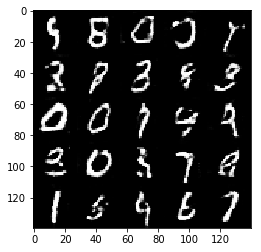

Epoch 2/2... Discriminator Loss: 0.8018... Generator Loss: 1.9355
Epoch 2/2... Discriminator Loss: 0.7342... Generator Loss: 1.5279
Epoch 2/2... Discriminator Loss: 0.8721... Generator Loss: 1.0920
Epoch 2/2... Discriminator Loss: 0.7632... Generator Loss: 1.3084
Epoch 2/2... Discriminator Loss: 0.7078... Generator Loss: 1.3744
Epoch 2/2... Discriminator Loss: 0.7319... Generator Loss: 1.3927
Epoch 2/2... Discriminator Loss: 1.2514... Generator Loss: 3.1598


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.8869... Generator Loss: 1.1491
Epoch 1/1... Discriminator Loss: 0.5430... Generator Loss: 3.2337
Epoch 1/1... Discriminator Loss: 0.5246... Generator Loss: 4.4051
Epoch 1/1... Discriminator Loss: 0.4632... Generator Loss: 3.0382
Epoch 1/1... Discriminator Loss: 0.5999... Generator Loss: 6.6502
Epoch 1/1... Discriminator Loss: 0.7740... Generator Loss: 1.5287
Epoch 1/1... Discriminator Loss: 1.2044... Generator Loss: 4.2968
Epoch 1/1... Discriminator Loss: 0.7692... Generator Loss: 1.5073
Epoch 1/1... Discriminator Loss: 0.7511... Generator Loss: 2.5509
Epoch 1/1... Discriminator Loss: 0.6878... Generator Loss: 2.6431


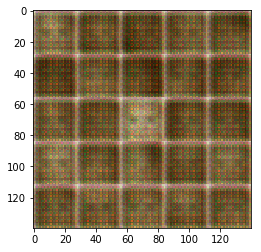

Epoch 1/1... Discriminator Loss: 0.7805... Generator Loss: 1.3803
Epoch 1/1... Discriminator Loss: 0.9915... Generator Loss: 0.9463
Epoch 1/1... Discriminator Loss: 0.6889... Generator Loss: 1.6123
Epoch 1/1... Discriminator Loss: 0.5987... Generator Loss: 2.2688
Epoch 1/1... Discriminator Loss: 0.6097... Generator Loss: 3.2048
Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.7847
Epoch 1/1... Discriminator Loss: 0.6658... Generator Loss: 2.9804
Epoch 1/1... Discriminator Loss: 1.1324... Generator Loss: 3.1163
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 3.5449
Epoch 1/1... Discriminator Loss: 0.8310... Generator Loss: 1.3734


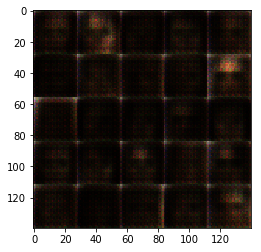

Epoch 1/1... Discriminator Loss: 1.3357... Generator Loss: 3.6661
Epoch 1/1... Discriminator Loss: 0.6435... Generator Loss: 2.1952
Epoch 1/1... Discriminator Loss: 0.8622... Generator Loss: 2.2782
Epoch 1/1... Discriminator Loss: 0.8946... Generator Loss: 1.6973
Epoch 1/1... Discriminator Loss: 0.7505... Generator Loss: 1.4204
Epoch 1/1... Discriminator Loss: 0.8596... Generator Loss: 2.7455
Epoch 1/1... Discriminator Loss: 0.7702... Generator Loss: 1.7965
Epoch 1/1... Discriminator Loss: 1.0391... Generator Loss: 1.0135
Epoch 1/1... Discriminator Loss: 0.8600... Generator Loss: 1.2385
Epoch 1/1... Discriminator Loss: 0.9421... Generator Loss: 1.2172


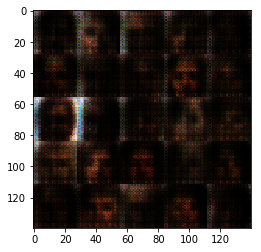

Epoch 1/1... Discriminator Loss: 0.9488... Generator Loss: 2.0680
Epoch 1/1... Discriminator Loss: 0.9338... Generator Loss: 1.1314
Epoch 1/1... Discriminator Loss: 1.2037... Generator Loss: 2.4177
Epoch 1/1... Discriminator Loss: 1.1400... Generator Loss: 0.7859
Epoch 1/1... Discriminator Loss: 0.8697... Generator Loss: 1.3329
Epoch 1/1... Discriminator Loss: 1.3751... Generator Loss: 0.6231
Epoch 1/1... Discriminator Loss: 0.8850... Generator Loss: 1.7468
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.5304
Epoch 1/1... Discriminator Loss: 0.9409... Generator Loss: 0.9905
Epoch 1/1... Discriminator Loss: 1.0454... Generator Loss: 0.8822


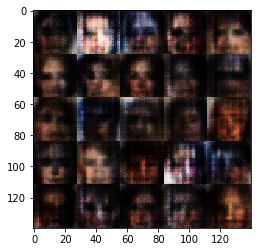

Epoch 1/1... Discriminator Loss: 1.0978... Generator Loss: 1.1336
Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 2.0751
Epoch 1/1... Discriminator Loss: 1.8726... Generator Loss: 0.3252
Epoch 1/1... Discriminator Loss: 0.8863... Generator Loss: 1.4856
Epoch 1/1... Discriminator Loss: 1.0219... Generator Loss: 1.0040
Epoch 1/1... Discriminator Loss: 1.4009... Generator Loss: 2.9402
Epoch 1/1... Discriminator Loss: 1.0971... Generator Loss: 0.9423
Epoch 1/1... Discriminator Loss: 1.1326... Generator Loss: 0.7641
Epoch 1/1... Discriminator Loss: 1.1321... Generator Loss: 0.7839
Epoch 1/1... Discriminator Loss: 1.2118... Generator Loss: 0.7355


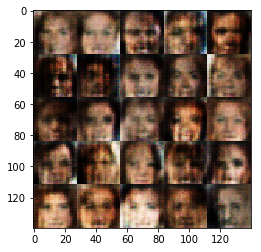

Epoch 1/1... Discriminator Loss: 1.2329... Generator Loss: 2.4672
Epoch 1/1... Discriminator Loss: 1.0256... Generator Loss: 1.8959
Epoch 1/1... Discriminator Loss: 1.1240... Generator Loss: 0.9348
Epoch 1/1... Discriminator Loss: 1.0722... Generator Loss: 1.3423
Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 0.8068
Epoch 1/1... Discriminator Loss: 1.1114... Generator Loss: 0.8650
Epoch 1/1... Discriminator Loss: 1.2285... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 1.1562... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 0.9846... Generator Loss: 1.5229
Epoch 1/1... Discriminator Loss: 1.0154... Generator Loss: 1.8035


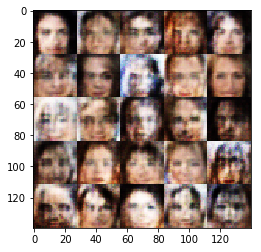

Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.5620
Epoch 1/1... Discriminator Loss: 0.9612... Generator Loss: 1.7619
Epoch 1/1... Discriminator Loss: 1.3241... Generator Loss: 0.5724
Epoch 1/1... Discriminator Loss: 1.1455... Generator Loss: 0.7509
Epoch 1/1... Discriminator Loss: 0.7880... Generator Loss: 1.3140
Epoch 1/1... Discriminator Loss: 0.8258... Generator Loss: 1.3710
Epoch 1/1... Discriminator Loss: 1.0309... Generator Loss: 0.8901
Epoch 1/1... Discriminator Loss: 1.5101... Generator Loss: 0.4939
Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 0.6146
Epoch 1/1... Discriminator Loss: 0.8944... Generator Loss: 1.1281


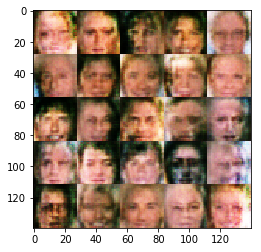

Epoch 1/1... Discriminator Loss: 1.0813... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 1.1210... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 0.9560... Generator Loss: 1.0195
Epoch 1/1... Discriminator Loss: 0.8887... Generator Loss: 1.0849
Epoch 1/1... Discriminator Loss: 0.8788... Generator Loss: 2.6914
Epoch 1/1... Discriminator Loss: 1.9108... Generator Loss: 0.3590
Epoch 1/1... Discriminator Loss: 0.8050... Generator Loss: 1.5445
Epoch 1/1... Discriminator Loss: 0.7959... Generator Loss: 1.2860
Epoch 1/1... Discriminator Loss: 0.7882... Generator Loss: 1.6272
Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 2.9381


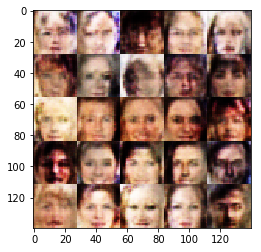

Epoch 1/1... Discriminator Loss: 1.5141... Generator Loss: 0.4837
Epoch 1/1... Discriminator Loss: 1.2139... Generator Loss: 2.5057
Epoch 1/1... Discriminator Loss: 0.9052... Generator Loss: 1.2132
Epoch 1/1... Discriminator Loss: 0.8465... Generator Loss: 1.1984
Epoch 1/1... Discriminator Loss: 0.7446... Generator Loss: 1.5084
Epoch 1/1... Discriminator Loss: 1.0127... Generator Loss: 0.9524
Epoch 1/1... Discriminator Loss: 1.1281... Generator Loss: 0.7373
Epoch 1/1... Discriminator Loss: 0.7901... Generator Loss: 1.3381
Epoch 1/1... Discriminator Loss: 0.8528... Generator Loss: 1.2984
Epoch 1/1... Discriminator Loss: 1.2056... Generator Loss: 0.6466


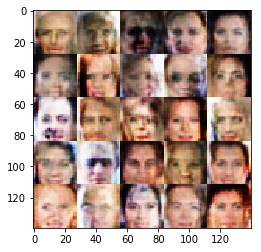

Epoch 1/1... Discriminator Loss: 0.8777... Generator Loss: 1.3484
Epoch 1/1... Discriminator Loss: 0.9468... Generator Loss: 1.6685
Epoch 1/1... Discriminator Loss: 0.8045... Generator Loss: 1.3349
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.5427
Epoch 1/1... Discriminator Loss: 0.9833... Generator Loss: 1.0466
Epoch 1/1... Discriminator Loss: 0.9200... Generator Loss: 1.1959
Epoch 1/1... Discriminator Loss: 0.9504... Generator Loss: 1.5011
Epoch 1/1... Discriminator Loss: 1.5166... Generator Loss: 0.4576
Epoch 1/1... Discriminator Loss: 1.4120... Generator Loss: 3.2347
Epoch 1/1... Discriminator Loss: 0.9450... Generator Loss: 0.9659


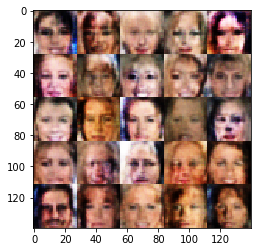

Epoch 1/1... Discriminator Loss: 0.8751... Generator Loss: 1.3352
Epoch 1/1... Discriminator Loss: 0.8880... Generator Loss: 1.4364
Epoch 1/1... Discriminator Loss: 0.8920... Generator Loss: 1.0611
Epoch 1/1... Discriminator Loss: 0.8454... Generator Loss: 1.6739
Epoch 1/1... Discriminator Loss: 0.7914... Generator Loss: 1.1945
Epoch 1/1... Discriminator Loss: 1.6065... Generator Loss: 2.3397
Epoch 1/1... Discriminator Loss: 1.4247... Generator Loss: 0.5920
Epoch 1/1... Discriminator Loss: 0.8433... Generator Loss: 1.3518
Epoch 1/1... Discriminator Loss: 0.7220... Generator Loss: 1.7367
Epoch 1/1... Discriminator Loss: 0.9442... Generator Loss: 1.0282


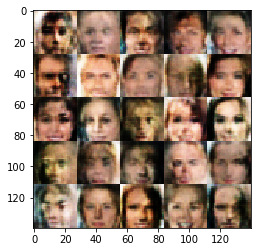

Epoch 1/1... Discriminator Loss: 0.9306... Generator Loss: 0.9647
Epoch 1/1... Discriminator Loss: 1.1124... Generator Loss: 2.8872
Epoch 1/1... Discriminator Loss: 0.9473... Generator Loss: 0.9397
Epoch 1/1... Discriminator Loss: 0.7346... Generator Loss: 1.4854
Epoch 1/1... Discriminator Loss: 0.8125... Generator Loss: 1.2964
Epoch 1/1... Discriminator Loss: 1.0139... Generator Loss: 0.8446
Epoch 1/1... Discriminator Loss: 1.0023... Generator Loss: 0.8316
Epoch 1/1... Discriminator Loss: 0.7639... Generator Loss: 1.8650
Epoch 1/1... Discriminator Loss: 0.7800... Generator Loss: 1.3741
Epoch 1/1... Discriminator Loss: 0.6275... Generator Loss: 1.8312


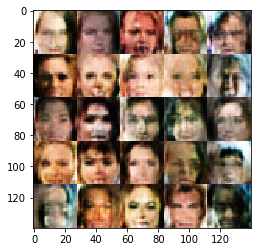

Epoch 1/1... Discriminator Loss: 0.9085... Generator Loss: 2.4166
Epoch 1/1... Discriminator Loss: 0.6351... Generator Loss: 2.5597
Epoch 1/1... Discriminator Loss: 1.2491... Generator Loss: 2.3951
Epoch 1/1... Discriminator Loss: 0.6353... Generator Loss: 1.6445
Epoch 1/1... Discriminator Loss: 0.5719... Generator Loss: 1.9519
Epoch 1/1... Discriminator Loss: 0.7484... Generator Loss: 1.4654
Epoch 1/1... Discriminator Loss: 1.7229... Generator Loss: 0.3446
Epoch 1/1... Discriminator Loss: 0.6428... Generator Loss: 3.4637
Epoch 1/1... Discriminator Loss: 0.5358... Generator Loss: 2.2894
Epoch 1/1... Discriminator Loss: 0.7253... Generator Loss: 1.4950


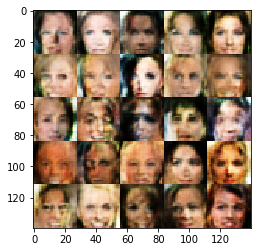

Epoch 1/1... Discriminator Loss: 0.5079... Generator Loss: 2.3187
Epoch 1/1... Discriminator Loss: 0.6258... Generator Loss: 1.6424
Epoch 1/1... Discriminator Loss: 0.4697... Generator Loss: 2.5658
Epoch 1/1... Discriminator Loss: 0.6352... Generator Loss: 1.7158
Epoch 1/1... Discriminator Loss: 0.5317... Generator Loss: 2.6236
Epoch 1/1... Discriminator Loss: 1.6652... Generator Loss: 0.3409
Epoch 1/1... Discriminator Loss: 0.5124... Generator Loss: 2.2395
Epoch 1/1... Discriminator Loss: 0.6311... Generator Loss: 1.5779
Epoch 1/1... Discriminator Loss: 0.6949... Generator Loss: 1.4685
Epoch 1/1... Discriminator Loss: 1.0698... Generator Loss: 0.8097


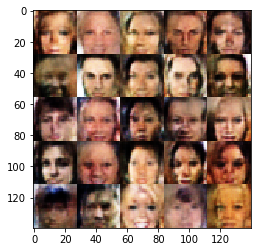

Epoch 1/1... Discriminator Loss: 0.8607... Generator Loss: 1.0703
Epoch 1/1... Discriminator Loss: 0.8621... Generator Loss: 1.1696
Epoch 1/1... Discriminator Loss: 0.6602... Generator Loss: 3.5331
Epoch 1/1... Discriminator Loss: 0.5793... Generator Loss: 1.8781
Epoch 1/1... Discriminator Loss: 0.6449... Generator Loss: 3.2892
Epoch 1/1... Discriminator Loss: 0.5473... Generator Loss: 1.9615
Epoch 1/1... Discriminator Loss: 0.4654... Generator Loss: 3.9410
Epoch 1/1... Discriminator Loss: 0.5964... Generator Loss: 2.2893
Epoch 1/1... Discriminator Loss: 0.9370... Generator Loss: 0.8941
Epoch 1/1... Discriminator Loss: 0.5701... Generator Loss: 2.2214


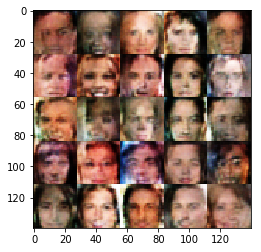

Epoch 1/1... Discriminator Loss: 0.7512... Generator Loss: 1.2190
Epoch 1/1... Discriminator Loss: 0.3986... Generator Loss: 3.7019
Epoch 1/1... Discriminator Loss: 0.5140... Generator Loss: 2.0859
Epoch 1/1... Discriminator Loss: 1.1055... Generator Loss: 1.8337
Epoch 1/1... Discriminator Loss: 1.5500... Generator Loss: 3.3171
Epoch 1/1... Discriminator Loss: 0.6019... Generator Loss: 2.1400
Epoch 1/1... Discriminator Loss: 0.6990... Generator Loss: 1.3826
Epoch 1/1... Discriminator Loss: 0.7425... Generator Loss: 1.2516
Epoch 1/1... Discriminator Loss: 1.0091... Generator Loss: 0.8253
Epoch 1/1... Discriminator Loss: 0.5971... Generator Loss: 2.1297


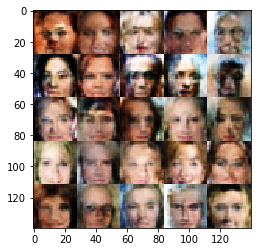

Epoch 1/1... Discriminator Loss: 0.4930... Generator Loss: 2.4495
Epoch 1/1... Discriminator Loss: 0.4797... Generator Loss: 2.9013
Epoch 1/1... Discriminator Loss: 0.9310... Generator Loss: 0.9424
Epoch 1/1... Discriminator Loss: 0.5439... Generator Loss: 2.0306
Epoch 1/1... Discriminator Loss: 0.4804... Generator Loss: 3.0157
Epoch 1/1... Discriminator Loss: 0.4020... Generator Loss: 3.3848
Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 1.5622
Epoch 1/1... Discriminator Loss: 1.2703... Generator Loss: 2.5849
Epoch 1/1... Discriminator Loss: 0.6815... Generator Loss: 1.5353
Epoch 1/1... Discriminator Loss: 0.4698... Generator Loss: 2.9679


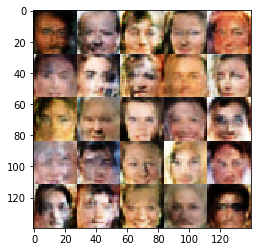

Epoch 1/1... Discriminator Loss: 0.9342... Generator Loss: 0.9347
Epoch 1/1... Discriminator Loss: 0.4796... Generator Loss: 3.7402
Epoch 1/1... Discriminator Loss: 0.4099... Generator Loss: 3.4694
Epoch 1/1... Discriminator Loss: 0.5116... Generator Loss: 2.3088
Epoch 1/1... Discriminator Loss: 0.4394... Generator Loss: 2.6372
Epoch 1/1... Discriminator Loss: 0.6451... Generator Loss: 1.9817
Epoch 1/1... Discriminator Loss: 0.4840... Generator Loss: 2.3903
Epoch 1/1... Discriminator Loss: 0.6828... Generator Loss: 1.3620
Epoch 1/1... Discriminator Loss: 0.4361... Generator Loss: 2.6180
Epoch 1/1... Discriminator Loss: 0.7658... Generator Loss: 1.3780


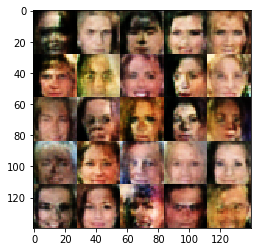

Epoch 1/1... Discriminator Loss: 0.4409... Generator Loss: 3.1522
Epoch 1/1... Discriminator Loss: 0.6440... Generator Loss: 1.6850
Epoch 1/1... Discriminator Loss: 0.6608... Generator Loss: 2.5953
Epoch 1/1... Discriminator Loss: 0.8754... Generator Loss: 2.6621
Epoch 1/1... Discriminator Loss: 0.5053... Generator Loss: 2.3587
Epoch 1/1... Discriminator Loss: 0.6175... Generator Loss: 1.5972
Epoch 1/1... Discriminator Loss: 0.4107... Generator Loss: 3.8224
Epoch 1/1... Discriminator Loss: 1.1073... Generator Loss: 3.0410
Epoch 1/1... Discriminator Loss: 0.5151... Generator Loss: 3.8610
Epoch 1/1... Discriminator Loss: 0.4398... Generator Loss: 3.4119


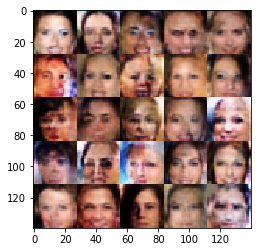

Epoch 1/1... Discriminator Loss: 0.5581... Generator Loss: 3.2660
Epoch 1/1... Discriminator Loss: 0.4587... Generator Loss: 2.7338
Epoch 1/1... Discriminator Loss: 0.4724... Generator Loss: 2.3773
Epoch 1/1... Discriminator Loss: 0.4420... Generator Loss: 2.5915
Epoch 1/1... Discriminator Loss: 0.5805... Generator Loss: 1.7458
Epoch 1/1... Discriminator Loss: 2.1981... Generator Loss: 0.2303
Epoch 1/1... Discriminator Loss: 1.2301... Generator Loss: 0.9259
Epoch 1/1... Discriminator Loss: 0.8439... Generator Loss: 1.4425
Epoch 1/1... Discriminator Loss: 1.0839... Generator Loss: 0.7783
Epoch 1/1... Discriminator Loss: 0.8087... Generator Loss: 2.6285


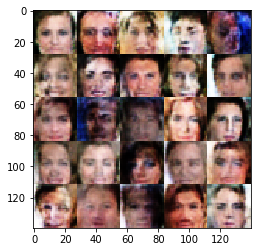

Epoch 1/1... Discriminator Loss: 0.8015... Generator Loss: 1.2469
Epoch 1/1... Discriminator Loss: 0.4634... Generator Loss: 2.4798
Epoch 1/1... Discriminator Loss: 0.4331... Generator Loss: 2.7749
Epoch 1/1... Discriminator Loss: 0.7833... Generator Loss: 4.2362
Epoch 1/1... Discriminator Loss: 0.5104... Generator Loss: 2.1646
Epoch 1/1... Discriminator Loss: 0.5069... Generator Loss: 2.4623
Epoch 1/1... Discriminator Loss: 0.7731... Generator Loss: 1.2572
Epoch 1/1... Discriminator Loss: 0.5306... Generator Loss: 2.8034
Epoch 1/1... Discriminator Loss: 0.4815... Generator Loss: 2.4149
Epoch 1/1... Discriminator Loss: 0.5197... Generator Loss: 2.0901


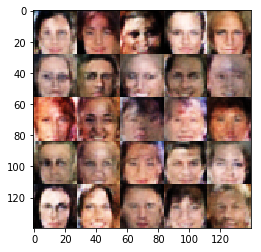

Epoch 1/1... Discriminator Loss: 0.4909... Generator Loss: 2.9944
Epoch 1/1... Discriminator Loss: 0.4572... Generator Loss: 2.5833
Epoch 1/1... Discriminator Loss: 0.4118... Generator Loss: 3.3199
Epoch 1/1... Discriminator Loss: 1.6925... Generator Loss: 3.2601
Epoch 1/1... Discriminator Loss: 0.8664... Generator Loss: 1.6839
Epoch 1/1... Discriminator Loss: 0.8367... Generator Loss: 1.2148
Epoch 1/1... Discriminator Loss: 0.6714... Generator Loss: 2.0527
Epoch 1/1... Discriminator Loss: 0.4866... Generator Loss: 3.5827
Epoch 1/1... Discriminator Loss: 0.5948... Generator Loss: 2.5182
Epoch 1/1... Discriminator Loss: 0.5654... Generator Loss: 1.9455


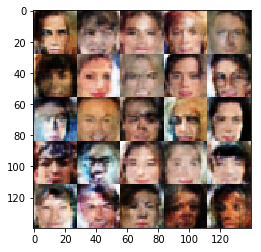

Epoch 1/1... Discriminator Loss: 0.5854... Generator Loss: 1.7268
Epoch 1/1... Discriminator Loss: 0.4288... Generator Loss: 3.0531
Epoch 1/1... Discriminator Loss: 0.3995... Generator Loss: 3.3922
Epoch 1/1... Discriminator Loss: 0.6770... Generator Loss: 1.4486
Epoch 1/1... Discriminator Loss: 0.4675... Generator Loss: 2.7061
Epoch 1/1... Discriminator Loss: 0.4577... Generator Loss: 2.9792
Epoch 1/1... Discriminator Loss: 0.5311... Generator Loss: 2.1863
Epoch 1/1... Discriminator Loss: 1.0301... Generator Loss: 2.3374
Epoch 1/1... Discriminator Loss: 0.7895... Generator Loss: 1.3371
Epoch 1/1... Discriminator Loss: 0.5499... Generator Loss: 1.9517


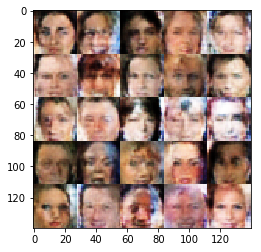

Epoch 1/1... Discriminator Loss: 0.5302... Generator Loss: 2.0435
Epoch 1/1... Discriminator Loss: 0.5274... Generator Loss: 2.9220
Epoch 1/1... Discriminator Loss: 0.4159... Generator Loss: 3.1591
Epoch 1/1... Discriminator Loss: 0.6358... Generator Loss: 3.3232
Epoch 1/1... Discriminator Loss: 0.4700... Generator Loss: 2.4713
Epoch 1/1... Discriminator Loss: 0.4075... Generator Loss: 3.1829
Epoch 1/1... Discriminator Loss: 0.4346... Generator Loss: 2.7524
Epoch 1/1... Discriminator Loss: 0.3738... Generator Loss: 3.7507
Epoch 1/1... Discriminator Loss: 0.4938... Generator Loss: 2.1733
Epoch 1/1... Discriminator Loss: 0.6078... Generator Loss: 1.6199


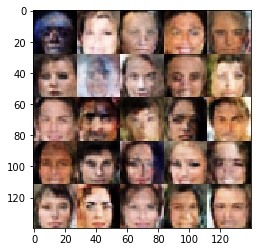

Epoch 1/1... Discriminator Loss: 0.4223... Generator Loss: 3.2939
Epoch 1/1... Discriminator Loss: 0.4709... Generator Loss: 3.2957
Epoch 1/1... Discriminator Loss: 0.3838... Generator Loss: 3.7172
Epoch 1/1... Discriminator Loss: 0.4210... Generator Loss: 2.8591
Epoch 1/1... Discriminator Loss: 0.5220... Generator Loss: 1.9874
Epoch 1/1... Discriminator Loss: 0.6550... Generator Loss: 1.4785
Epoch 1/1... Discriminator Loss: 3.3012... Generator Loss: 0.1066
Epoch 1/1... Discriminator Loss: 1.1641... Generator Loss: 1.3286
Epoch 1/1... Discriminator Loss: 0.9820... Generator Loss: 1.9752
Epoch 1/1... Discriminator Loss: 0.9547... Generator Loss: 0.9466


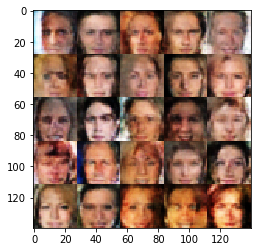

Epoch 1/1... Discriminator Loss: 0.7849... Generator Loss: 1.3963
Epoch 1/1... Discriminator Loss: 1.1915... Generator Loss: 0.7997
Epoch 1/1... Discriminator Loss: 0.7802... Generator Loss: 1.4362
Epoch 1/1... Discriminator Loss: 0.7760... Generator Loss: 2.5545
Epoch 1/1... Discriminator Loss: 0.7021... Generator Loss: 1.9489
Epoch 1/1... Discriminator Loss: 0.4807... Generator Loss: 2.5319
Epoch 1/1... Discriminator Loss: 0.6640... Generator Loss: 1.5333
Epoch 1/1... Discriminator Loss: 0.7812... Generator Loss: 1.1634
Epoch 1/1... Discriminator Loss: 0.5436... Generator Loss: 2.5081
Epoch 1/1... Discriminator Loss: 0.4943... Generator Loss: 2.2439


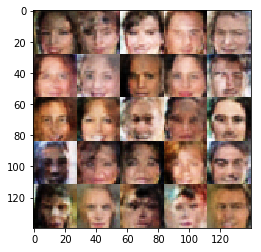

Epoch 1/1... Discriminator Loss: 0.5742... Generator Loss: 1.7216
Epoch 1/1... Discriminator Loss: 1.0279... Generator Loss: 1.7382
Epoch 1/1... Discriminator Loss: 0.8823... Generator Loss: 1.5875
Epoch 1/1... Discriminator Loss: 0.7307... Generator Loss: 1.5529
Epoch 1/1... Discriminator Loss: 0.6615... Generator Loss: 1.7428
Epoch 1/1... Discriminator Loss: 0.7004... Generator Loss: 1.5497
Epoch 1/1... Discriminator Loss: 0.9381... Generator Loss: 0.9755
Epoch 1/1... Discriminator Loss: 0.5714... Generator Loss: 2.0188
Epoch 1/1... Discriminator Loss: 0.6596... Generator Loss: 1.6710
Epoch 1/1... Discriminator Loss: 0.4553... Generator Loss: 2.5608


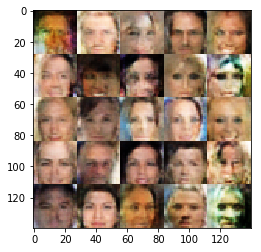

Epoch 1/1... Discriminator Loss: 0.4961... Generator Loss: 2.3504
Epoch 1/1... Discriminator Loss: 0.5803... Generator Loss: 2.0750
Epoch 1/1... Discriminator Loss: 0.4901... Generator Loss: 2.3907
Epoch 1/1... Discriminator Loss: 0.4546... Generator Loss: 2.6727
Epoch 1/1... Discriminator Loss: 0.7560... Generator Loss: 2.3249
Epoch 1/1... Discriminator Loss: 0.5406... Generator Loss: 1.9447
Epoch 1/1... Discriminator Loss: 0.6960... Generator Loss: 1.3888
Epoch 1/1... Discriminator Loss: 0.3984... Generator Loss: 3.6483
Epoch 1/1... Discriminator Loss: 0.5823... Generator Loss: 1.7471
Epoch 1/1... Discriminator Loss: 0.4941... Generator Loss: 2.2863


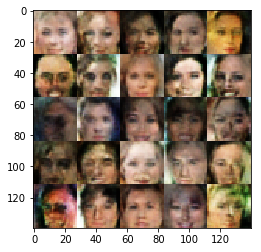

Epoch 1/1... Discriminator Loss: 0.4181... Generator Loss: 2.9886
Epoch 1/1... Discriminator Loss: 0.4563... Generator Loss: 2.4341
Epoch 1/1... Discriminator Loss: 2.6587... Generator Loss: 5.4364
Epoch 1/1... Discriminator Loss: 0.8358... Generator Loss: 2.4134
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 3.2067
Epoch 1/1... Discriminator Loss: 0.7600... Generator Loss: 1.4502
Epoch 1/1... Discriminator Loss: 0.8161... Generator Loss: 1.1584
Epoch 1/1... Discriminator Loss: 0.4655... Generator Loss: 3.0191
Epoch 1/1... Discriminator Loss: 0.6627... Generator Loss: 1.6691
Epoch 1/1... Discriminator Loss: 0.5052... Generator Loss: 2.1970


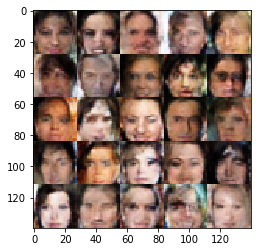

Epoch 1/1... Discriminator Loss: 0.4516... Generator Loss: 2.5603
Epoch 1/1... Discriminator Loss: 0.5694... Generator Loss: 1.8171
Epoch 1/1... Discriminator Loss: 0.5046... Generator Loss: 2.2344
Epoch 1/1... Discriminator Loss: 0.5237... Generator Loss: 2.0588
Epoch 1/1... Discriminator Loss: 0.4334... Generator Loss: 2.7787
Epoch 1/1... Discriminator Loss: 0.5271... Generator Loss: 2.0294
Epoch 1/1... Discriminator Loss: 0.5355... Generator Loss: 2.4693
Epoch 1/1... Discriminator Loss: 0.5349... Generator Loss: 3.1797
Epoch 1/1... Discriminator Loss: 0.3991... Generator Loss: 3.1550
Epoch 1/1... Discriminator Loss: 0.5816... Generator Loss: 1.8437


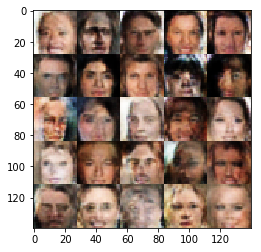

Epoch 1/1... Discriminator Loss: 0.7325... Generator Loss: 1.3047
Epoch 1/1... Discriminator Loss: 0.4229... Generator Loss: 3.1133
Epoch 1/1... Discriminator Loss: 4.1612... Generator Loss: 7.0118
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 1.0679
Epoch 1/1... Discriminator Loss: 1.1740... Generator Loss: 0.7291
Epoch 1/1... Discriminator Loss: 1.2043... Generator Loss: 0.7193
Epoch 1/1... Discriminator Loss: 1.0297... Generator Loss: 0.8917
Epoch 1/1... Discriminator Loss: 0.7473... Generator Loss: 1.8687
Epoch 1/1... Discriminator Loss: 0.8198... Generator Loss: 1.2156
Epoch 1/1... Discriminator Loss: 1.0316... Generator Loss: 0.8214


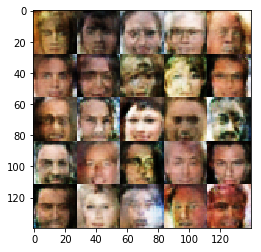

Epoch 1/1... Discriminator Loss: 0.6961... Generator Loss: 3.2044
Epoch 1/1... Discriminator Loss: 0.5725... Generator Loss: 1.9514
Epoch 1/1... Discriminator Loss: 0.5638... Generator Loss: 1.9105
Epoch 1/1... Discriminator Loss: 0.7375... Generator Loss: 1.4215
Epoch 1/1... Discriminator Loss: 0.7452... Generator Loss: 2.1146
Epoch 1/1... Discriminator Loss: 0.4043... Generator Loss: 3.3076


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.